# Master Code for 96 well plate data (OD600 and fluorescence)

prior to using this code, you must add to the exported excel file

1. download the file onto your computer

2. next to the time collumn, create a new collumn and label it 'Time'
        rename your original time collumn if necessary

3. in the first row, paste this code: =INT(B1 - A1) & " days " & TEXT(MOD(B1 - A1, 1), "h:mm:ss")
    -  you may need to adjust B1 and A1 accordingly

4. in the second row, paste this code: =INT(BXX - B$XX) & " days " & TEXT(MOD(BXX - B$XX, 1), "h:mm:ss")

    -  for 'BXX' replace the X's with the row the you are currently on
    -  for 'B$XX' replace the X's with the first row
    -  overall you are doing start time - current time to get length of time since the first measurement
5. copy and paste the code down the collumn

your code is now readable as a timedelta file in python

## section one: selecting data from your dataframe in excel ## 

1. go to your file in your computer (make sure it is saved on the computer and not in a onedrive), right click, hit 'copy as path'

2.  paste the path in between the red parenthesis

3.  at 'header =', enter in the row number your data collumn starts at.
    -  note: header = is the starting row of your data collumn. Remember python indexes starting from zero. so in excel, if the starting row of your data collumn is 52 in excel, in python it will be 51.

4.  enter in the number of rows your data takes up for nrows = 
    -  note: if your data starts at row 52 and ends at row 245, do 245 - 52 = 193 rows

summary: This code reads selects the block of data from the file that you will be using in this code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from cycler import cycler

#Code for the OD600 of CRISPR part one
OD600 = pd.read_excel(r'C:\Users\lexav\Downloads\07-19-2025 inducer test.xlsx', header=151, nrows= 97)
Fluor = pd.read_excel(r'C:\Users\lexav\Downloads\07-19-2025 inducer test.xlsx', header=50, nrows= 97)
# Convert string to Timedelta
OD600['Time'] = pd.to_timedelta(OD600['Time'])
Fluor['Time'] = pd.to_timedelta(Fluor['Time'])

#converting the timedelta object to total hours
OD600['Hours'] = OD600['Time'].dt.total_seconds() /3600
Fluor['Hours'] = Fluor['Time'].dt.total_seconds() /3600



### Function for calculating averages of samples

In [2]:
def avgfunc(data, replicates):
    averages = data[replicates].mean(axis=1)
    return averages

### Defining the dataset with dictionaries

strains_dictionary: each list is a row on your 96 well plate where each row is a different test condition. For example, '010 induced' is row B, where you induced the bacteria in the wells B2, B3, B4... etc. 

each list must be updated everytime you use a new dataset with this code. 

First update the key of the list according to your sample condition
- Here, the keys are '010 induced' and '010 not induced'

Next, update the wells you used in your experiment
- Here, my bacteria grew in wells B2 - B11. If I only put bacteria in wells B2 and B3, I would need to delete wells B4-B11 from this list. 

In [3]:
#define a dictionary for averaging

# define a list of strains. this contains 2 string elements
strains_list = ['010 induced','010 not induced']

# defines a dictionary of key value pairs. the keys are the string elements (001, C02, 003, 010)
strains_dictionary = {          
    '010 not induced': ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11'],
    '010 induced': ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11'],
}
# define labels and colors
labels = {
    '010 induced': '010 induced',
    '010 not induced': '010 not induced',
}

# takes the average OD600 reading for that row
OD_averages = {key: avgfunc(OD600, col) for key, col in strains_dictionary.items()}
# takes the average fluorescence for that row
Fluor_averages = {key: avgfunc(Fluor, col) for key, col in strains_dictionary.items()}


### Plotting OD600 Averages

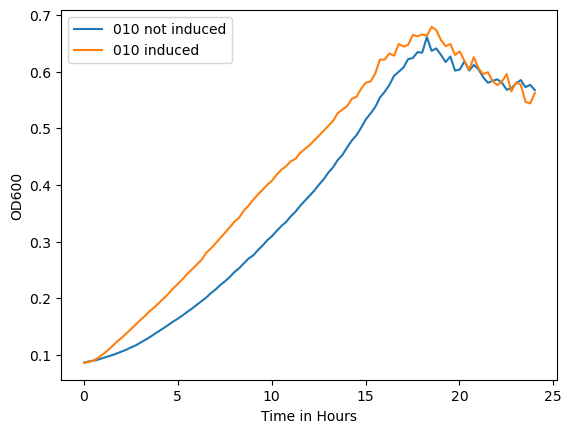

In [4]:
for key, avg in OD_averages.items():
    plt.plot(OD600['Hours'], avg, label=labels[key])

plt.xlabel('Time in Hours')
plt.ylabel('OD600')
plt.legend()
plt.show()

### Plotting fluorescence averages

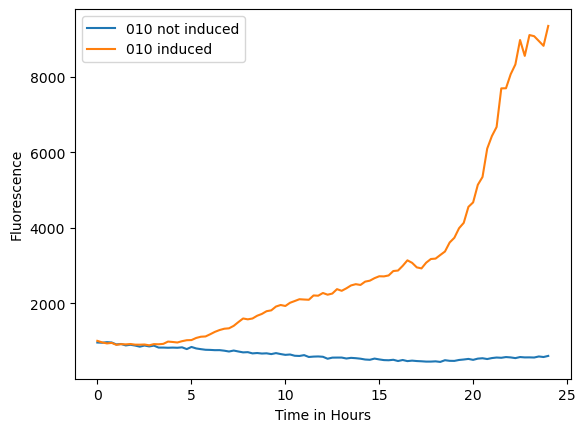

In [7]:
import numpy as np

for key, avg in Fluor_averages.items():
    plt.plot(OD600['Hours'], avg, label=labels[key])

plt.xlabel('Time in Hours')
plt.ylabel('Fluorescence')
plt.legend()
plt.show()

#convert dictionaries to np arrays 
OD_np = np.array(list(OD_averages.values()))
fluor_np = np.array(list(Fluor_averages.values()))

# dividing fluorescence by OD600 to normalize it
normalized = np.divide(fluor_np, OD_np)


### Normalizing fluorescence and plotting

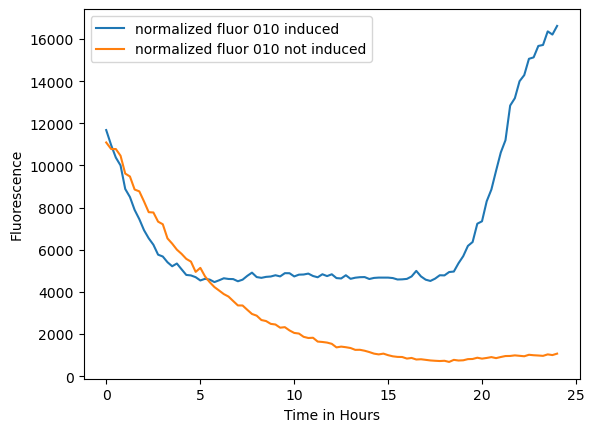

In [8]:
plt.plot(OD600['Hours'], normalized[1], label = 'normalized fluor 010 induced')
plt.plot(OD600['Hours'], normalized[0], label = 'normalized fluor 010 not induced')
plt.xlabel('Time in Hours')
plt.ylabel('Fluorescence')
plt.legend()
plt.show()

# Plotting individual OD600 averages

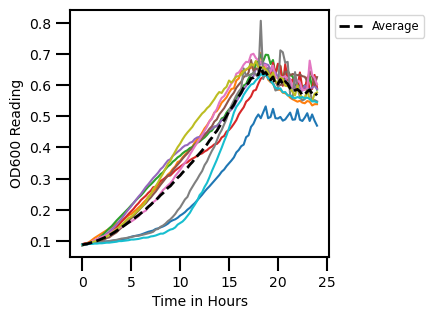

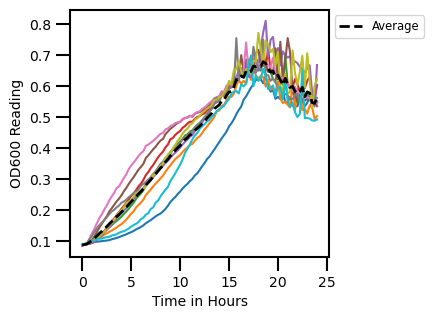

In [9]:
# Plot each column individually and the average as a line in the middle

import matplotlib.pyplot as plt
for Letter, LetterNumber in strains_dictionary.items():

    # create a new figure for each plot
    fig, ax = plt.subplots(figsize=(3.5, 3))  # 350x300 pixels converted to inches
    subplot_index = 0

    # set the frame margins, converted from pizels to proportion of the figure
    plt.subplots_adjust(left=80/350, right=1-10/300, bottom=50/350, top=1-10/300)

    # set the frame thickness
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    
    subplot_index = 0

    # plotting the OD600 of each well
    for LetterNumberTime in LetterNumber:
        ax.plot(OD600['Hours'], OD600[LetterNumberTime])
        #comment the following if exporting for papers
        plt.xlabel("Time in Hours")
        plt.ylabel("OD600 Reading")
    
    #plotting the average with this
    ax.plot(OD600['Hours'], OD600[LetterNumber].mean(axis=1), label='Average', color='black', linestyle='--', linewidth=2)
    ax.legend(bbox_to_anchor=(1, 1), fontsize='small')
    subplot_index += 1

    # set major ticks length and width
    ax.tick_params(which='major', length=10, width=1.5)


plt.show()


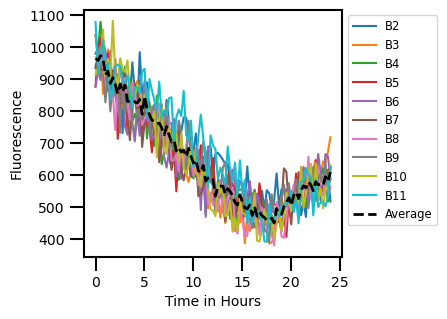

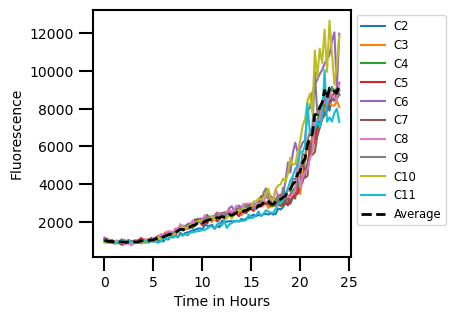

In [10]:
# Plot each column individually and the average as a line in the middle

import matplotlib.pyplot as plt
for Letter, LetterNumber in strains_dictionary.items():

    # create a new figure for each plot
    fig, ax = plt.subplots(figsize=(3.5, 3))  # 350x300 pixels converted to inches
    subplot_index = 0

    # set the frame margins, converted from pizels to proportion of the figure
    plt.subplots_adjust(left=80/350, right=1-10/300, bottom=50/350, top=1-10/300)

    # set the frame thickness
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)

    
    subplot_index = 0

    # plotting the Fluor of each well
    for LetterNumberTime in LetterNumber:
        ax.plot(OD600['Hours'], Fluor[LetterNumberTime], label = LetterNumberTime)
        #comment the following if exporting for papers
        plt.xlabel("Time in Hours")
        plt.ylabel("Fluorescence")
    
    #plotting the average with this
    ax.plot(OD600['Hours'], Fluor[LetterNumber].mean(axis=1), label='Average', color='black', linestyle='--', linewidth=2)
    ax.legend(bbox_to_anchor=(1, 1), fontsize='small')
    subplot_index += 1

    # set major ticks length and width
    ax.tick_params(which='major', length=10, width=1.5)



plt.show()


# Normalized fluor averages vs individual wells

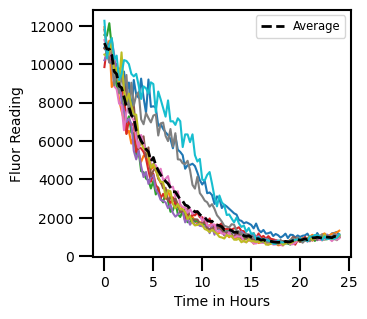

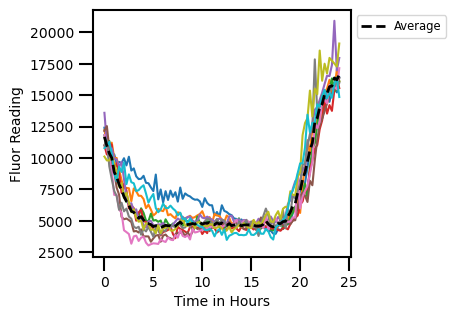

In [11]:
# Plot each column individually and the average as a line in the middle

import matplotlib.pyplot as plt
for Letter, LetterNumber in strains_dictionary.items():

    # create a new figure for each plot
    fig, ax = plt.subplots(figsize=(3.5, 3))  # 350x300 pixels converted to inches
    subplot_index = 0

    # set the frame margins, converted from pizels to proportion of the figure
    plt.subplots_adjust(left=80/350, right=1-10/300, bottom=50/350, top=1-10/300)

    # set the frame thickness
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    
    subplot_index = 0

    # plotting the Fluor of each well
    for LetterNumberTime in LetterNumber:
        ax.plot(Fluor['Hours'], Fluor[LetterNumberTime]/OD600[LetterNumberTime])
        #comment the following if exporting for papers
        plt.xlabel("Time in Hours")
        plt.ylabel("Fluor Reading")
    
    #plotting the average with this
    ax.plot(Fluor['Hours'], Fluor[LetterNumber].mean(axis=1)/OD600[LetterNumber].mean(axis=1), label='Average', color='black', linestyle='--', linewidth=2)
    ax.legend(bbox_to_anchor=(1, 1), fontsize='small')
    subplot_index += 1

    # set major ticks length and width
    ax.tick_params(which='major', length=10, width=1.5)


plt.show()


### Smoothing data with exponential smoothing

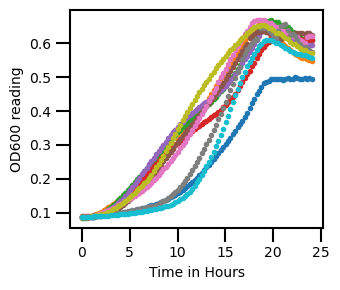

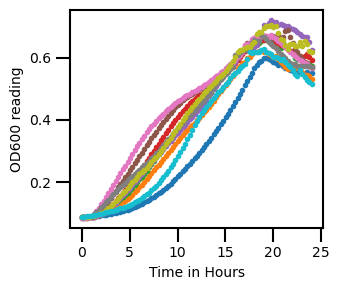

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.api import SimpleExpSmoothing


# exponential smoothing


for Letter, LetterNumber in strains_dictionary.items():
    
    # Create a new figure for each plot
    fig, ax = plt.subplots(figsize=(3.5, 3))  # 350x300 pixels converted to inches
    
    # Set the frame margins (converted from pixels to proportion of the figure)
    plt.subplots_adjust(left=80/350, right=1-10/300, bottom=50/350, top=1-10/300)

    # Set the frame thickness
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    #change this number as needed
    alpha = .2

    for LetterNumberTime in LetterNumber:
        OD600[LetterNumberTime] = pd.to_numeric(OD600[LetterNumberTime])
        model = SimpleExpSmoothing(OD600[LetterNumberTime]) #instance of the class SimpleExpSmoothing(SES)
        fitted = model.fit(smoothing_level = alpha, optimized = False)
        ax.plot(OD600['Hours'], fitted.fittedvalues, linestyle = 'none', marker = 'o', markersize = 3 )
        plt.xlabel("Time in Hours")
        plt.ylabel("OD600 reading")
    
    # Set the major ticks length and width
    ax.tick_params(which='major', length=10, width=1.5)

  

    # Display the plot
    plt.tight_layout()
    plt.show()
